## 검색

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd


global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

#AI

검색 키워드를 입력해주세요 AI
필요한 뉴스기사의 숫자를 입력해주세요 2000


,title,url
0,"김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의",https://www.yna.co.kr/view/AKR2022080810650006...
1,"KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...
2,삼성전자 ‘AI 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...
3,"삼성전자, AI인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406
4,'2022 스마트농업 AI 경진대회' 개최,http://www.aflnews.co.kr/news/articleView.html...
...,...,...
1995,"[기업] KT-KAIST·포스텍·한양대, 채용연계 AI 과정 모집",https://www.ytn.co.kr/_ln/0102_202208011716530203
1996,잇단 기업 내부 횡령사건에 뜬 이 회사…AI로 부정거래 '꼼짝마',http://www.newsis.com/view/?id=NISX20220710_00...
1997,'초개인화' 시대…AI가 옷 골라주고 화장품 제조도 척척,http://www.newsis.com/view/?id=NISX20220720_00...
1998,"[특징주] 마이더스AI, 663억원 규모 유상증자 소식에 급락",https://biz.chosun.com/stock/market_trend/2022...


- 중복값 제거

In [34]:
news_df[news_df['title'].duplicated() == True] 
news_df=news_df.drop_duplicates(subset=['title'])
news_df.describe()

,title,url
count,1627,1627
unique,1627,1627
top,"김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의",https://www.yna.co.kr/view/AKR2022080810650006...
freq,1,1


In [35]:
news_df[news_df['title'].duplicated() == True]

,title,url


In [36]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
title_list

['김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의',
 'KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발',
 '삼성전자 ‘AI 챌린지’',
 '삼성전자, AI인재 키워 반도체·디스플레이 연구한다',
 "'2022 스마트농업 AI 경진대회' 개최",
 "코트라, 'AI 활용'…중견기업 ESG 모니터링 지원",
 '빅데이터·AI 기술로 교통사고 막는다… 도로교통공단, 위험도로예측 서비스 ...',
 '영남중·대구고 SW동아리, MS 주최 AI 경진대회 수상',
 "네이버-네이버클라우드-충북대병원, AI 활용한 스마트 병원 구축 '맞손'",
 '"AI 상담원이 사람 잡아먹는다"더니…놀라운 일이 벌어졌다',
 'KT, 공감하는 AI로 ‘사람다운’ 로봇 세상 만든다',
 '타임게이트, NIA ‘2022년 AI 학습용 데이터 구축’ 6개 분야 수행기관 선정',
 'KT 대구경북본부, AI로봇 등 인공지능 기반 다양한 서비스 제공',
 '아마존, AI 로봇 진심 ‘아이로봇’ 품었다',
 '1억개 데이터·AI로 피부병 정밀 진단·예측',
 'AI와 대화·이동통신 모니터링…‘고독사 예방’ 팔걷은 지자체들',
 "삼성전자, 대학·대학원생 대상 '2022 삼성 AI 챌린지' 개최",
 '영진전문대 AI융합기계계열, 로봇관련 학술대회 논문상 수상',
 'KT-NIPA, ICT 벤처에 DX 컨설팅·AI인재 양성 지원',
 '조선대 김영식 교수, 프라이버시 보장 AI 기술 공동 개발',
 '조선대 ‘AI·SW 여름방학 아카데미’ 진행',
 '충북테크노파크 OpenLAB, AI로봇 코딩교육 추진',
 '현대차 `R&D 경력` 세자릿수 채용… AI 인터뷰 도입',
 '도매꾹, B2B 마켓 최초 AI 상품추천 서비스',
 '서울시-KAIST, 기업 내부서 고급 AI개발자 인력 양성하도록 지원',
 '동강대\xa0AI\xa0기반 맞춤형 토익 프로그램 실시',
 "지금 들어가고 9월까지는 팔아라…AI가 예언하는 '나스닥100'",
 '남성희 전문대교협회장 "전문대 AI·반도체 전

## 저장

- 임시저장

In [37]:
#list > df > csv
title_df = pd.DataFrame(title_list)
title_df.to_csv('AI_title.csv',header=None, index=None)

- 다시 불러오기

In [28]:
title_df = pd.read_csv('AI_title.csv', header=None)
title_df.rename(columns={0:'title'}, inplace=True)
title_list=title_df['title'].values.tolist()
title_list

['김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의',
 'KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발',
 '삼성전자 ‘AI 챌린지’',
 '삼성전자, AI인재 키워 반도체·디스플레이 연구한다',
 "'2022 스마트농업 AI 경진대회' 개최",
 "코트라, 'AI 활용'…중견기업 ESG 모니터링 지원",
 '빅데이터·AI 기술로 교통사고 막는다… 도로교통공단, 위험도로예측 서비스 ...',
 '영남중·대구고 SW동아리, MS 주최 AI 경진대회 수상',
 "네이버-네이버클라우드-충북대병원, AI 활용한 스마트 병원 구축 '맞손'",
 '"AI 상담원이 사람 잡아먹는다"더니…놀라운 일이 벌어졌다',
 'KT, 공감하는 AI로 ‘사람다운’ 로봇 세상 만든다',
 '타임게이트, NIA ‘2022년 AI 학습용 데이터 구축’ 6개 분야 수행기관 선정',
 'KT 대구경북본부, AI로봇 등 인공지능 기반 다양한 서비스 제공',
 '아마존, AI 로봇 진심 ‘아이로봇’ 품었다',
 '1억개 데이터·AI로 피부병 정밀 진단·예측',
 'AI와 대화·이동통신 모니터링…‘고독사 예방’ 팔걷은 지자체들',
 "삼성전자, 대학·대학원생 대상 '2022 삼성 AI 챌린지' 개최",
 '영진전문대 AI융합기계계열, 로봇관련 학술대회 논문상 수상',
 'KT-NIPA, ICT 벤처에 DX 컨설팅·AI인재 양성 지원',
 '조선대 김영식 교수, 프라이버시 보장 AI 기술 공동 개발',
 '조선대 ‘AI·SW 여름방학 아카데미’ 진행',
 '충북테크노파크 OpenLAB, AI로봇 코딩교육 추진',
 '현대차 `R&D 경력` 세자릿수 채용… AI 인터뷰 도입',
 '도매꾹, B2B 마켓 최초 AI 상품추천 서비스',
 '서울시-KAIST, 기업 내부서 고급 AI개발자 인력 양성하도록 지원',
 '동강대\xa0AI\xa0기반 맞춤형 토익 프로그램 실시',
 "지금 들어가고 9월까지는 팔아라…AI가 예언하는 '나스닥100'",
 '남성희 전문대교협회장 "전문대 AI·반도체 전

## 형태소 분석

In [38]:
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체
text

'김영환 지사 과기장관에 영재고 설립 지원 등 건의 서울성모병원 당뇨 관리 돕는 기술 개발 삼성전자 챌린지 삼성전자 인재 키워 반도체 디스플레이 연구한다 스마트농업 경진대회 개최 코트라 활용 중견기업 모니터링 지원 빅데이터 기술로 교통사고 막는다 도로교통공단 위험도로예측 서비스 영남중 대구고 동아리 주최 경진대회 수상 네이버 네이버클라우드 충북대병원 활용한 스마트 병원 구축 맞손 상담원이 사람 잡아먹는다 더니 놀라운 일이 벌어졌다 공감하는 로 사람다운 로봇 세상 만든다 타임게이트 년 학습용 데이터 구축 개 분야 수행기관 선정 대구경북본부 로봇 등 인공지능 기반 다양한 서비스 제공 아마존 로봇 진심 아이로봇 품었다 억개 데이터 로 피부병 정밀 진단 예측 와 대화 이동통신 모니터링 고독사 예방 팔걷은 지자체들 삼성전자 대학 대학원생 대상 삼성 챌린지 개최 영진전문대 융합기계계열 로봇관련 학술대회 논문상 수상 벤처에 컨설팅 인재 양성 지원 조선대 김영식 교수 프라이버시 보장 기술 공동 개발 조선대 여름방학 아카데미 진행 충북테크노파크 로봇 코딩교육 추진 현대차 경력 세자릿수 채용 인터뷰 도입 도매꾹 마켓 최초 상품추천 서비스 서울시 기업 내부서 고급 개발자 인력 양성하도록 지원 동강대 기반 맞춤형 토익 프로그램 실시 지금 들어가고 월까지는 팔아라 가 예언하는 나스닥 남성희 전문대교협회장 전문대 반도체 전공에 년제 허용해야 시대 미래전략 교육 대전환 네오텍 적용한 차세대 보안 서비스 사이트디펜더 출시 와 영어 말하기 대결 윤선생 말하톤 대회 개최 시 쓰는 인간에게 던지는 화두는 과기정통부 초일류 전략 내놓는다 활용 제고에 방점 는 죠 과기부 주최 심포지엄 주관사 합류 그룹사 총출동 조선대 화정중서 여름방학 아카데미 진행 라이언로켓 티그컴퍼니 접목한 새로운 컬처 선봬 카카오가 찜한 아이돌 뉴스 생방송에서 일냈다 가상인간 열풍 땅개 서 무장 호랑이 로 전투력 초격차로 적 초토화 스토리 똑똑한 은행원 나온다 금융위 가명정보 데이터로 허용 서울성모병원 기반 디지털 트윈 기술

In [39]:
#konlpy(콘엘피) = 형태소 분석 전
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환
morph

noun_list=[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1):
#         if word not in stop_word:
        noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

data_bf =dict(count.most_common(30)) #빈도수 정리 내림차
series = pd.Series(data_bf)
df1_bf=pd.DataFrame(series, columns=['cnt'])
df1_bf

,cnt
기술,143
개발,138
기반,130
서비스,118
솔루션,109
도입,96
데이터,94
활용,93
구축,91
의료,85


In [40]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['AI','인공','지능','개발','활용','기반','개최','구축','서비스']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

data_af =dict(count.most_common(30)) #빈도수 정리 내림차
series = pd.Series(data_af)
df_af=pd.DataFrame(series, columns=['cnt'])
df_af

,cnt
기술,143
솔루션,109
도입,96
데이터,94
의료,85
금융,81
기업,73
로봇,73
사업,72
관리,70


## wordcloud

### AI

(-0.5, 1499.5, 999.5, -0.5)

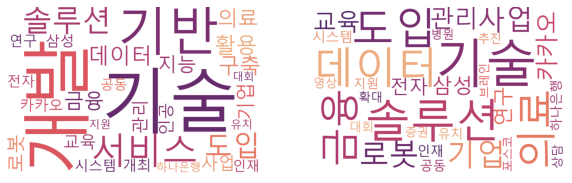

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data_bf)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data_af)
plt.imshow(wordcloud)
plt.axis('off')

## 트렌드 분석 및 인사이트

- AI관련 핵심 키워드
> 기술, 사업, 데이터, 솔루션
- 트렌드 및 인사이트 도출
> 교육, 인재, 양성 : AI 교육이 활성화되고있음 <br>
> 병원, 의료 : 의료분야의 AI 연구 활발 <br>
> 삼성, 반도체 : AI반도체가 국가적 전략기술로 부각되는 가운데, 삼성이 AI인재 양성계획 밝힘 <br>
> 금융, 하나은행,증권 : 금융권의 디지털 전환이 가속화. AI 기반 금융 서비스 구축. <br>
> 카카오, 상담: 카카오는 현재 AI분야에서 활발한 사업확장 중. AI상담챗봇, 카카오브레인의 AI작가, 기술윤리위원회(AI윤리규정 준수 여부)등을 신설.